# Chi-Square Tests

## Introduction

In this lesson you'll learn about another type of hypothesis test: the chi-square test! Also written as $\chi^2$ *test* or *chi-squared test*, this test is used for making claims about the frequencies of *categorical* data. Because it is testing frequencies rather than population parameters, this test is known as a *non-parametric* test.

## Objectives

You will be able to:

* Identify use cases for the chi-square test
* Distinguish between chi-square tests for goodness of fit, independence, and homogeneity
* Perform a chi-square test and make conclusions about an experiment based on the results

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Comparing t-tests and Chi-Square Tests

We'll introduce the chi-square test by comparing and contrasting it with a familiar statistical test: the t-test!

### t-test Refresher

The t-test is applicable for **continuous** variables that can be represented by a **probability density function** (PDF), which allows us to understand the data in terms of **parameters** such as the mean and variance. There are several different kinds of t-tests depending on the question being asked, although we have mainly focused on one-sample and two-sample (independent) tests.

For example, we might do a one-sample, two-tailed t-test if we have the following (made up) sample of data, and we are trying to determine whether the mean of this data is significantly different from a $\mu_{0}$ of 21.

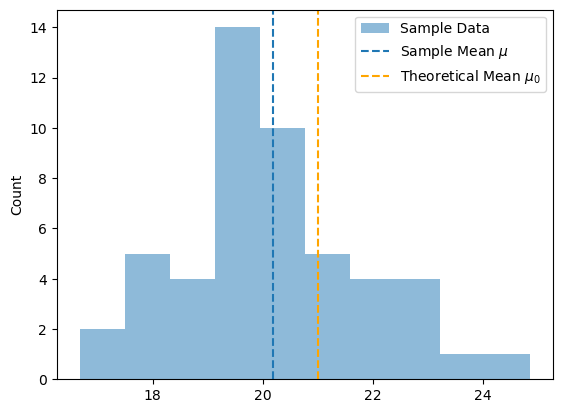

In [2]:
# Generate sample data as a normal continuous random variable
sample_data = stats.norm.rvs(loc=20, scale=2, size=50, random_state=5)

# Plot data as well as theoretical mean of 21
fig, ax = plt.subplots()
ax.hist(sample_data, alpha=0.5, label="Sample Data")
ax.axvline(sample_data.mean(), linestyle="--", label=r"Sample Mean $\mu$")
ax.axvline(21, linestyle="--", color="orange", label=r"Theoretical Mean $\mu_{0}$")
ax.set_ylabel("Count")
ax.legend();

Recall that the t-test:

* Has **null and alternative hypotheses about the mean(s)** of one or two samples. For the example shown above, the alternative hypothesis is $\mu \neq \mu_{0}$ (i.e. $\mu \neq 21$)
* Involves the calculation of a **t-statistic** (or t-value) that represents a standardized version of the difference between the two means, utilizing the sample variance as well as the number in the sample to perform this standardization
* Compares this t-statistic to the **t-distribution** (a bell-curve-shaped distribution) in order to determine whether we can reject the null hypothesis at a given alpha level — i.e. to determine whether the difference between the data and the theoretical expectation is statistically significant

The simplest way to execute a t-test is like this, using `scipy.stats`. We pass in the data plotted above, and use the hypotheses $H_{0}: \mu = \mu_{0}$ and $H_{a}: \mu \neq \mu_{0}$ as well as $\alpha = 0.01$ to come to a conclusion.

In [3]:
stats.ttest_1samp(sample_data, 21)

TtestResult(statistic=-3.335711380689097, pvalue=0.001628519936938842, df=49)

Based on the results above (two-sided, since our alternative hypothesis is $\mu_ \neq \mu_{0}$) we can reject the null hypothesis at an alpha of 0.01, since the resulting p-value (0.0016) is less than our alpha. Therefore we can say that the difference between the sample mean and 21 is statistically significant at the 0.01 significance level.

(If you look closely at the code generating the sample, it was generated using a `loc` (mean) of 20 and a fairly small `scale` (variance), so it it makes sense that we got this result!)

### Chi-Square Test Introduction

The chi-square ($\chi^2$) test is applicable for **discrete** variables that can be represented by a **probability mass function**, which allows us to understand the data in terms of the **frequencies** of each outcome. There are several different kinds of chi-square tests depending on the question being asked, but we'll focus on *Pearson's chi-square test* and how it is applied for goodness of fit, independence, and homogeneity.

Let's start with a ***goodness of fit*** example. This is kind of like the one-sample t-test shown above, in that we are comparing sample data to a theoretical value. This time instead of comparing the sample mean to a theoretical mean, we will compare the frequencies of observed data to the expected frequencies.

#### Fair Coin?

For this example, let's use the coin toss at the Super Bowl (data through Super Bowl 55). We expect that this is a "fair" coin, meaning that we would expect it to produce Heads and Tails equally often.

In [4]:
# Data from sportsbettingdime.com
sb_data = pd.read_csv("superbowl.csv")
sb_data.tail()

,Super Bowl,Coin Toss Outcome,Coin Toss Winner,Game Winner
50,51,Tails,Home Team,Away Team
51,52,Heads,Home Team,Away Team
52,53,Tails,Home Team,Away Team
53,54,Tails,Away Team,Home Team
54,55,Heads,Away Team,Home Team


In [5]:
coin_toss_counts = sb_data["Coin Toss Outcome"].value_counts().sort_index()
coin_toss_counts

Coin Toss Outcome
Heads    26
Tails    29
Name: count, dtype: int64

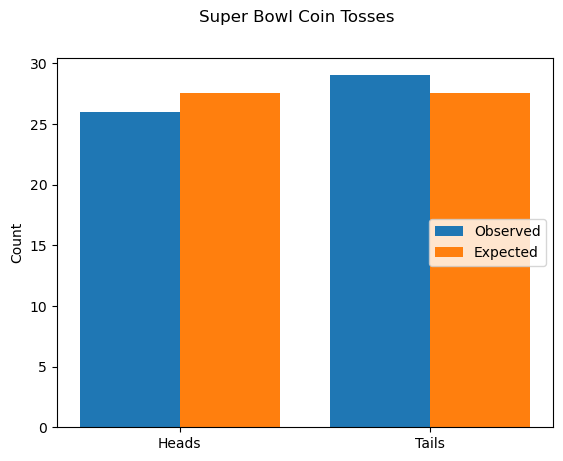

In [6]:
fig, ax = plt.subplots()

# Extract observed counts
fair_coin_observed = coin_toss_counts.values
# Heads and tails each expected half the time
fair_coin_expected = [sum(coin_toss_counts)/2, sum(coin_toss_counts)/2]

# Placeholder data for display purposes; you can ignore these values
x = np.array([0, 5])
offset = 1
bar_width = 2

# Plot bars
ax.bar(x-offset, fair_coin_observed, bar_width, label="Observed")
ax.bar(x+offset, fair_coin_expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Heads", "Tails"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Coin Tosses");

As with the previous graph, the orange shows a theoretical (expected) value and the blue shows what we actually observed from our sample.

Unlike the previous graph, the expected value is not a single line representing a parameter, it's a pair of orange bars showing how many times we would expect to see Heads and Tails outcomes.

As you can see, the coin toss at the Super Bowl has had slightly fewer Heads results and slightly more Tails results than we expected. But is that difference statistically significant?

To answer this, we'll need to perform a chi-square test.

A chi-square test:

* Has **null and alternative hypotheses about the frequencies of categorical data**. For the example shown above, we'll use the null hypothesis that $P(\text{Heads}) = 0.5$ and $P(\text{Tails}) = 0.5$, i.e. that there is no significant difference between the observed and expected values. The alternative hypothesis is that there is a significant difference.
* Involves the calculation of a **chi-square statistic** (also just referred to as $\chi^2$) that represents a standardized version of the difference between the observed and expected values
* Compares this $\chi^2$ to the **chi-square distribution** (the shape of which varies depending on the degrees of freedom) in order to determine whether we can reject the null hypothesis at a given alpha level — i.e. to determine whether the difference between the data and the theoretical expectation is statistically significant

Once again, the simplest way to do this is using `scipy.stats` ([documentation here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)). We'll again say that our alpha is 0.01.

In [7]:
fair_coin_result = stats.chisquare(fair_coin_observed, fair_coin_expected)
fair_coin_result

Power_divergenceResult(statistic=0.16363636363636364, pvalue=0.6858304344516056)

Based on the results above, we fail to reject the null hypothesis at our desired significance level. This is because we found a p-value of 0.69, which is higher than our specified $\alpha = 0.01$. (Chi-square tests are always one-tailed so we don't have to consider whether to divide the p-value by 2.)

In other words, we do not have statistically significant evidence that the coin used here is not a "fair" coin! This was an example of a "goodness of fit" application of chi-square.

#### Home-Field Advantage?

Another question we might want to ask is whether the home team wins more often than the away team.

In [8]:
game_winner_counts_sb = sb_data["Game Winner"].value_counts().sort_index()
game_winner_counts_sb

Game Winner
Away Team    31
Home Team    24
Name: count, dtype: int64

Interesting, it looks like the away team actually wins more often. But is this difference statistically significant?

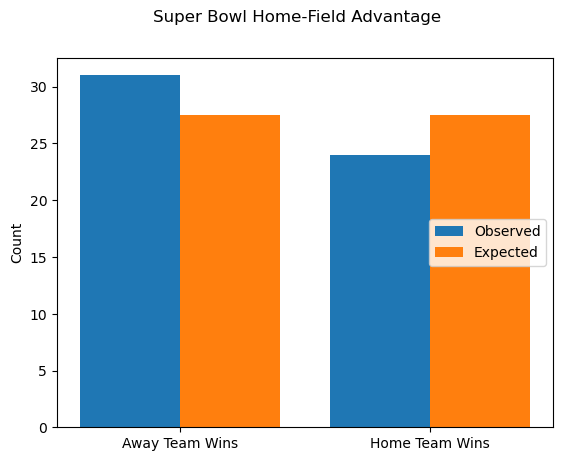

In [9]:
fig, ax = plt.subplots()

# Extract data
observed = game_winner_counts_sb.values
expected = [sum(game_winner_counts_sb)/2, sum(game_winner_counts_sb)/2]

# Plot bars
ax.bar(x-offset, observed, bar_width, label="Observed")
ax.bar(x+offset, expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Away Team Wins", "Home Team Wins"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Home-Field Advantage");

In [10]:
home_field_advantage_result_sb = stats.chisquare(observed, expected)
home_field_advantage_result_sb

Power_divergenceResult(statistic=0.8909090909090909, pvalue=0.34523107177184)

For the Super Bowl specifically, we don't have a low enough p-value to reject the null hypothesis that the home team and away team win equally often. In other words, we are not finding the difference to be statistically significant.

But what if we look at regular-season NFL games for the same time period?

In [11]:
# Data from FiveThirtyEight
nfl_data = pd.read_csv("nfl_games.csv")
# Narrow to relevant rows
nfl_data = nfl_data[(nfl_data["neutral"] == 0) & (nfl_data["playoff"] == 0) & (nfl_data["season"] >= 1966 )]
# Engineer a new feature
nfl_data.loc[nfl_data["result1"] == 0, "Game Winner"] = "Away Team"
nfl_data.loc[nfl_data["result1"] == 1, "Game Winner"] = "Home Team"

game_winner_counts_nfl = nfl_data["Game Winner"].value_counts().sort_index()
game_winner_counts_nfl

Game Winner
Away Team    5265
Home Team    7066
Name: count, dtype: int64

For this much larger dataset, it looks like the home team does win more often.

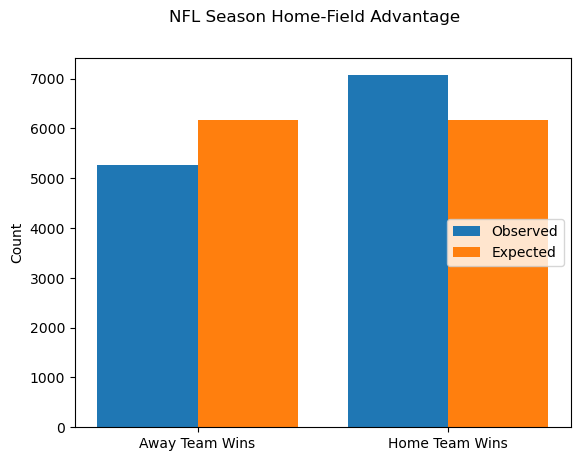

In [12]:
fig, ax = plt.subplots()

# Extract data
observed = game_winner_counts_nfl.values
expected = [sum(game_winner_counts_nfl)/2, sum(game_winner_counts_nfl)/2]

# Plot bars
ax.bar(x-offset, observed, bar_width, label="Observed")
ax.bar(x+offset, expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Away Team Wins", "Home Team Wins"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("NFL Season Home-Field Advantage");

In [14]:
home_field_advantage_result_nfl = stats.chisquare(observed, expected)
home_field_advantage_result_nfl

Power_divergenceResult(statistic=263.0444408401589, pvalue=3.7231908240550128e-59)

With our much larger dataset, we are able to reject the null hypothesis and say that there is a statistically significant difference between the win counts of home teams vs. away teams.

## Chi-Square Test Calculations

In some cases, you will have extremely limited time for applying statistical tests, and will only have the bandwidth to learn how the null and alternative hypotheses are set up, and the code to execute the test. You'll need to be comfortable with some level of ambiguity, now that you're familiar with statistical tests in general!

But for now, let's break down the previous problem to understand what this statistical test is doing. How did it produce that p-value?

### Chi-Square Statistic

Here is the formula for $\chi^2$:

# $$ \chi^2=\sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i} $$

Spelling this out, it means that we are finding the sum of the squared difference between the observed and expected values $(O_i - E_i)^2$ divided by the expected values $E_i$ for all categories $i$. Just like a t-statistic, it is representing the difference between values in a lower-dimensional way.

We'll apply this to our coin flip example below.

In [16]:
n = 2 # number of categories (Heads, Tails)
chi_square = sum([((fair_coin_observed[i] - fair_coin_expected[i])**2)/fair_coin_expected[i] for i in range(n)])
chi_square

0.16363636363636364

Note that this is the same as the statistic from when we called the `chisquare` function:

In [17]:
fair_coin_result.statistic

0.16363636363636364

### Chi-Square Distribution

Below we plot the relevant $\chi^2$ distribution for our current number of categories (degrees of freedom).

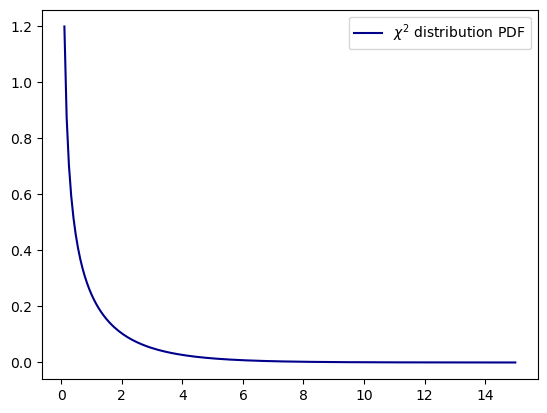

In [18]:
# Degrees of freedom
df = n - 1

fig, ax = plt.subplots()
x = np.linspace(0.1, 15, 200) # placeholder x values
y = stats.chi2.pdf(x, df)

ax.plot(x, y, color='darkblue', label=r"$\chi^2$ distribution PDF")
ax.legend();

Then we can find the critical $\chi^2$ value and plot that as well.

In [19]:
alpha = 0.01
critical_value = stats.chi2.ppf(1-alpha, df=df)
critical_value

6.634896601021215

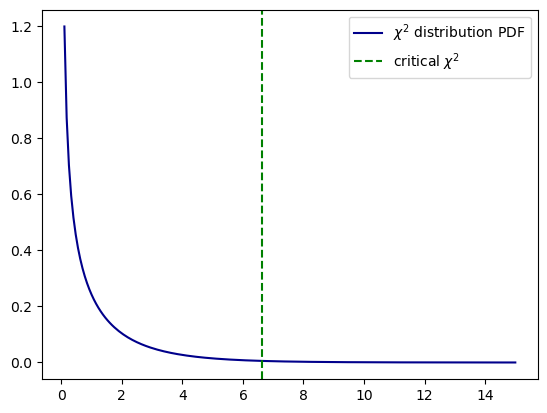

In [20]:
fig, ax = plt.subplots()

ax.plot(x, y, color='darkblue', label=r"$\chi^2$ distribution PDF")
ax.axvline(critical_value, color='green', linestyle="--", label=r"critical $\chi^2$")

ax.legend();

We won't actually plot the rejection region here because it is so small; just know that anywhere under the blue PDF line and to the right of the green line is the rejection region.

Now we'll add our observed chi-square to this plot.

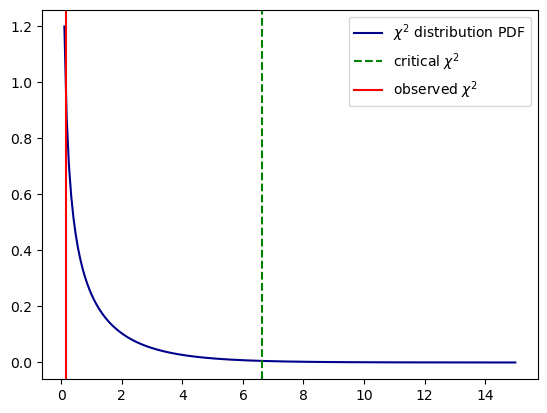

In [21]:
fig, ax = plt.subplots()

ax.plot(x, y, color='darkblue', label=r"$\chi^2$ distribution PDF")
ax.axvline(critical_value, color='green', linestyle="--", label=r"critical $\chi^2$")
ax.axvline(chi_square, color='red', label=r"observed $\chi^2$")

ax.legend();

To reject the null hypothesis, the observed chi-square would need to be to the right of the critical chi-square, but we can see that it is well to the left.

Alternatively, we could calculate the p-value directly:

In [22]:
stats.chi2.sf(chi_square, df=df)

0.6858304344516056

This is the same value we got from the `chisquare` function:

In [23]:
fair_coin_result.pvalue

0.6858304344516056

## Chi-Square Distributions by Degrees of Freedom

Note that the shape of the chi-square distribution is different depending on the degrees of freedom — it isn't always monotonically decreasing like the graph shown above. Distributions for various degrees of freedom are shown below:

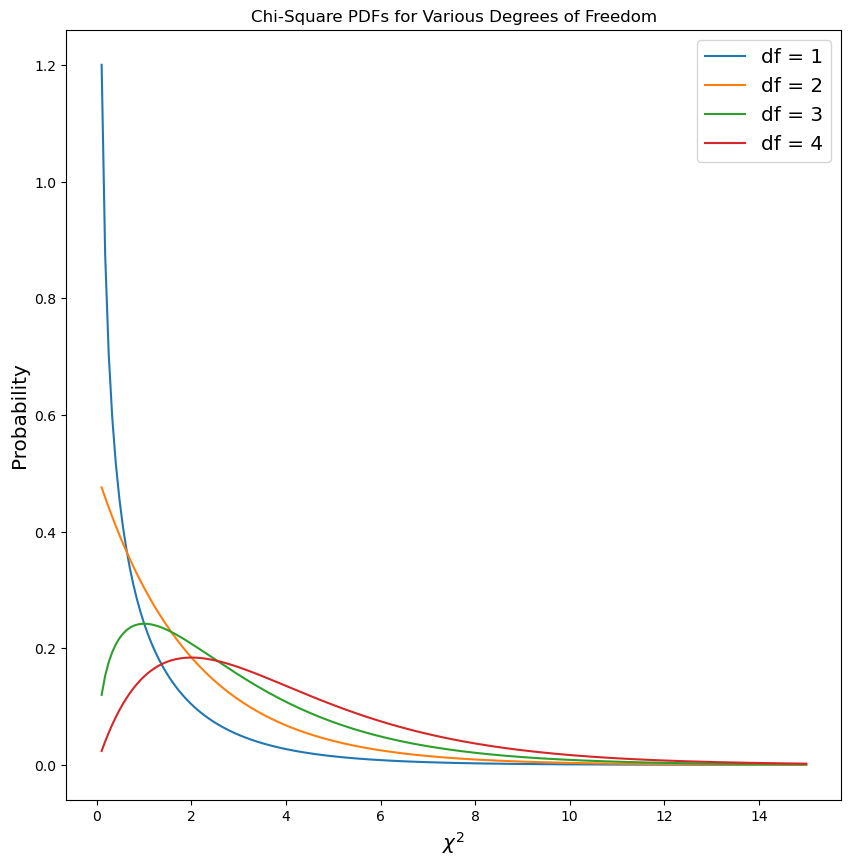

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

for df_ in range(1, 5):
    y_ = stats.chi2.pdf(x, df_)
    ax.plot(x, y_, label=f"df = {df_}")
    
ax.set_xlabel(r'$\chi^2$', fontsize="x-large")
ax.set_ylabel("Probability", fontsize="x-large")
ax.set_title("Chi-Square PDFs for Various Degrees of Freedom")
    
ax.legend(fontsize="x-large");

## Other Use Cases for Chi-Square Tests

The previous example was similar to a one-sample t-test because we were comparing one set of values to theoretical proportions represented by this concept of a "fair" coin.

The two other ways you can apply chi-square tests are more like two-sample t-tests, where we are comparing two separate samples to understand whether they are different. These techniques are called the test for independence and the test for homogeneity.

### Chi-Square Test for Independence

The chi-square test for independence is an important tool for scientific experimental design, where both the hypothesized independent and dependent variables are categorical rather than numeric.

Returning to our Super Bowl data, let's hypothesize a causal connection between two variables. We hypothesize that winning the coin toss is an independent variable, and winning the game is a dependent variable. In other words, that winning the coin toss and winning the game are not independent variables.

The null hypothesis is the opposite of this, that winning the coin toss and winning the game are independent variables and neither is dependent on the other.

One other way to phrase this as a research question is: **is winning the game related to winning the coin toss, or are these unrelated (independent) variables?**

Let's begin by aggregating the data — conveniently pandas has a `crosstab` function ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)) that will set this up for us automatically:

In [23]:
independence_table = pd.crosstab(sb_data["Coin Toss Winner"], sb_data["Game Winner"])
independence_table

Game Winner,Away Team,Home Team
Coin Toss Winner,,
Away Team,15,15
Home Team,16,9


We observe that there is a slight imbalance here, where the Home and Away team seem to win equally often when the Away team was the coin toss winner, but the Home team wins the game less often when the Home team was the coin toss winner.

(This aligns with a superstition/fan theory that winning the coin toss causes a game loss. As of this writing, the coin toss winner had not won the game for the past 7 Super Bowls!)

But, is the difference statistically significant?

Because we have the data set up as a [contingency table](https://en.wikipedia.org/wiki/Contingency_table), we can use the `chi2_contingency` function ([documentation here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)) instead of `chisquare`:

In [24]:
chi2, p, dof, ex = stats.chi2_contingency(independence_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 0.5920138888888885
p-value: 0.44164141533080714


The results are a little different, but we have our familiar chi-square statistic and p-value.

(The other two values returned are `dof`, the degree of freedom and `ex`, the expected frequencies calculated along the way.)

Again assuming $\alpha = 0.01$, we once again fail to reject the null hypothesis (that the variables are independent) because $p \nless \alpha$. We did not find statistically significant evidence that winning the coin toss is the independent variable and winning the game is the dependent variable.

### Chi-Square Test for Homogeneity

One other way we can use a chi-square test is a test for homogeneity. It is very subtly different from the previous test of independence in terms of the framing, but the code is very similar.

Whereas the independence test is about the *factors* (e.g. winning the coin toss vs. winning the game), homogeneity is about the *labels* (values) themselves. Similar to two-sample t-tests, the goal is comparing the distributions of two population samples, to understand whether their underlying populations follow the same distribution.

[This article](https://www.washingtonpost.com/sports/2020/11/11/home-field-advantage-is-lie/) argues that the home field advantage changed in the 2002-2019 seasons compared to the 2020 season, when the reduced crowd sizes reduced the home field advantage. Let's test that out.

In [25]:
nfl_data_subset = nfl_data[nfl_data["season"] >= 2002].copy()
nfl_data_subset.loc[nfl_data_subset["season"] <= 2019, "Timing"] = "Before"
nfl_data_subset.loc[nfl_data_subset["season"] > 2019, "Timing"] = "After"
nfl_data_subset[["date", "season", "Game Winner", "Timing"]]

,date,season,Game Winner,Timing
11735,2002-09-05,2002,Away Team,Before
11736,2002-09-08,2002,Away Team,Before
11737,2002-09-08,2002,Home Team,Before
11738,2002-09-08,2002,Home Team,Before
11739,2002-09-08,2002,Away Team,Before
...,...,...,...,...
16792,2021-01-03,2020,Home Team,After
16793,2021-01-03,2020,Away Team,After
16794,2021-01-03,2020,Away Team,After
16795,2021-01-03,2020,Away Team,After


In [26]:
homogeneity_table = pd.crosstab(nfl_data_subset["Timing"], nfl_data_subset["Game Winner"])
homogeneity_table

Game Winner,Away Team,Home Team
Timing,,
After,128,127
Before,1952,2610


In [27]:
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 5.103806036450754
p-value: 0.023873404668602688


If we are using an alpha of 0.05, this p-value means that we can agree with the article author, that there is a statistically significant difference in the home field advantage for 2020 compared to previous seasons.

## Additional Resources

* [Video explanation](https://youtu.be/TyD-_1JUhxw) of the different kinds of chi-square tests
* [More examples of the chi-square test for homogeneity](https://www.stats4stem.org/chi-square-test-for-homogeneity)

## Summary

The chi-squared test is a useful test for determining whether there are statistically significant differences in the frequencies of different categorical features. It can be used to compare a single categorical variable against a theoretical frequency, or to compare two categorical features using a contingency table.